In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , f1_score 


import warnings;
warnings.filterwarnings('ignore')

In [622]:
df = pd.read_csv('simple_loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [623]:
# duplicate data in dataset
df.duplicated().sum()

0

In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [625]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [626]:
# null value in dataset 
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [627]:
percentage_missing = df.isna().sum()*100/len(df)
percentage_missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [628]:
missing_values_df = pd.DataFrame({'column_name':df.columns,
                                 'percentage_missing':percentage_missing,
                                 'No_missing_values':df.isna().sum()})
                                 
missing_values_df.sort_values(by ='percentage_missing' ,ascending=False)

,column_name,percentage_missing,No_missing_values
Credit_History,Credit_History,8.143322,50
Self_Employed,Self_Employed,5.211726,32
LoanAmount,LoanAmount,3.583062,22
Dependents,Dependents,2.442997,15
Loan_Amount_Term,Loan_Amount_Term,2.280130,14
Gender,Gender,2.117264,13
Married,Married,0.488599,3
Loan_ID,Loan_ID,0.000000,0
Education,Education,0.000000,0
ApplicantIncome,ApplicantIncome,0.000000,0


<AxesSubplot: >

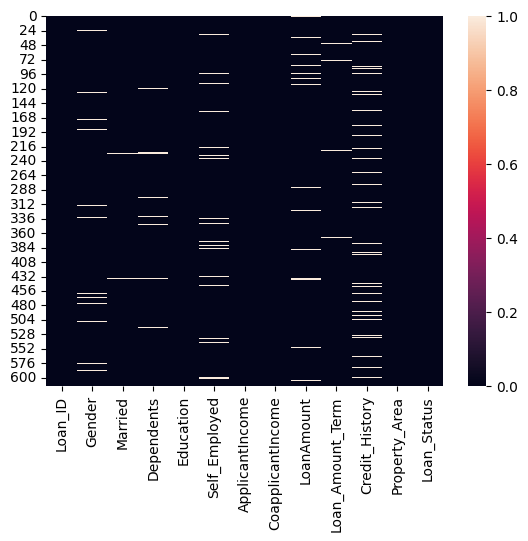

In [629]:
sns.heatmap(df.isna())

In [630]:
# column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [631]:
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History']

In [632]:
for col in categorical_cols:
    print(f'nunique of {col.upper()} :')
    print(df[col].nunique())
    print()

nunique of GENDER :
2

nunique of MARRIED :
2

nunique of DEPENDENTS :
4

nunique of EDUCATION :
2

nunique of SELF_EMPLOYED :
2

nunique of LOAN_AMOUNT_TERM :
10

nunique of CREDIT_HISTORY :
2



In [633]:
for col in categorical_cols:
    print(f'Value_counts of {col.upper()} :')
    print(df[col].value_counts())
    print()

Value_counts of GENDER :
Male      489
Female    112
Name: Gender, dtype: int64

Value_counts of MARRIED :
Yes    398
No     213
Name: Married, dtype: int64

Value_counts of DEPENDENTS :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value_counts of EDUCATION :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value_counts of SELF_EMPLOYED :
No     500
Yes     82
Name: Self_Employed, dtype: int64

Value_counts of LOAN_AMOUNT_TERM :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Value_counts of CREDIT_HISTORY :
1.0    475
0.0     89
Name: Credit_History, dtype: int64



<AxesSubplot: title={'center': 'Loan Status'}, ylabel='Loan_Status'>

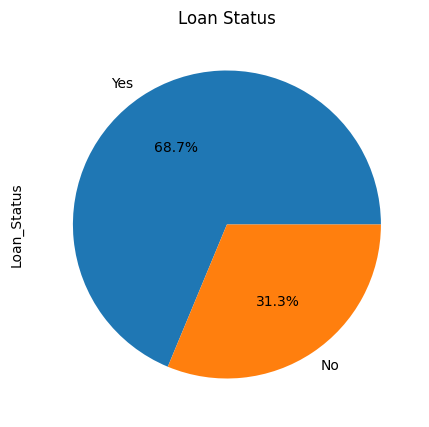

In [634]:
# Lebel graph
labels = ["Yes", "No"]
df['Loan_Status'].value_counts().plot.pie(figsize = (7,5), labels=labels, autopct='%1.1f%%', title = "Loan Status")

<AxesSubplot: title={'center': 'Gender'}, ylabel='Gender'>

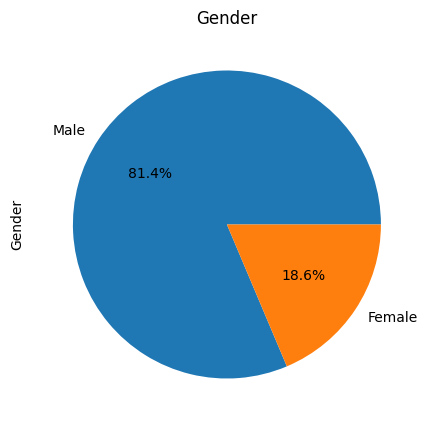

In [635]:
# gender graph
df['Gender'].value_counts().plot.pie(figsize = (7,5), title = 'Gender', autopct="%1.1f%%")

In [636]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot: xlabel='Gender'>

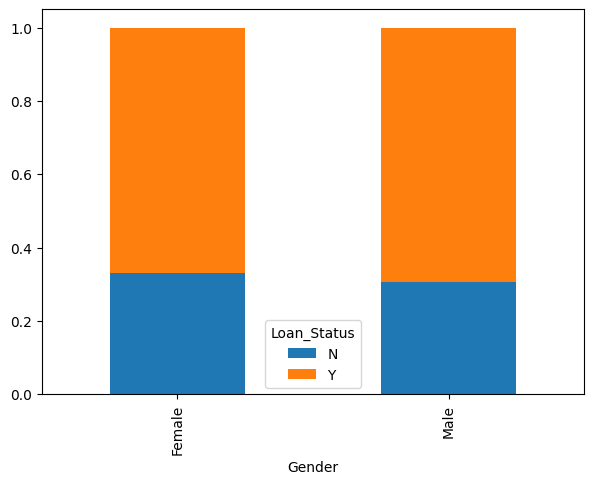

In [637]:
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True,figsize = (7,5))

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Density'>

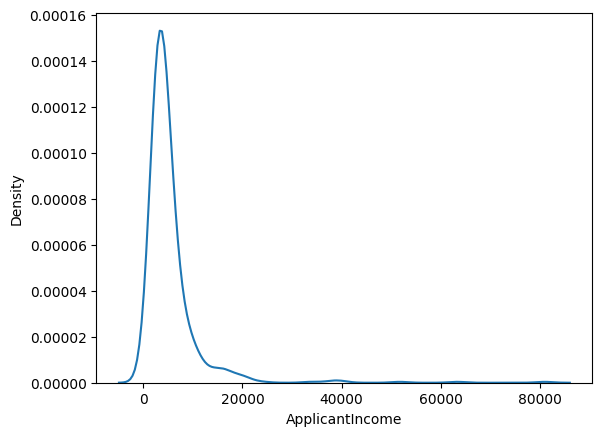

In [638]:
sns.kdeplot(x = df['ApplicantIncome'])

<AxesSubplot: xlabel='Married', ylabel='count'>

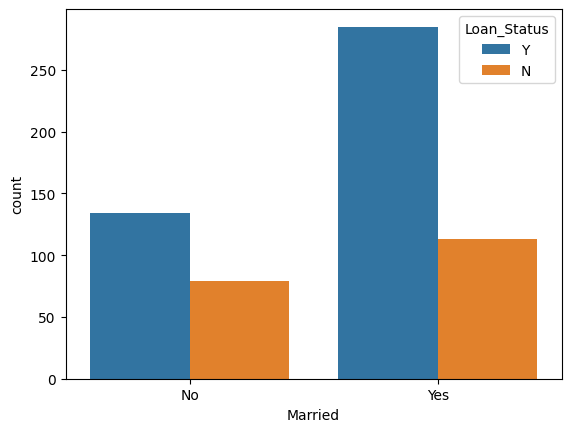

In [639]:
sns.countplot(x = "Married", data = df, hue="Loan_Status")

<AxesSubplot: xlabel='Education', ylabel='count'>

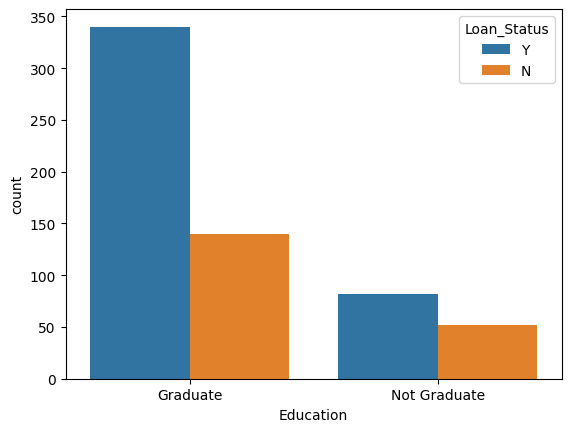

In [640]:
sns.countplot(x = "Education", data = df, hue="Loan_Status")

<AxesSubplot: xlabel='Education', ylabel='count'>

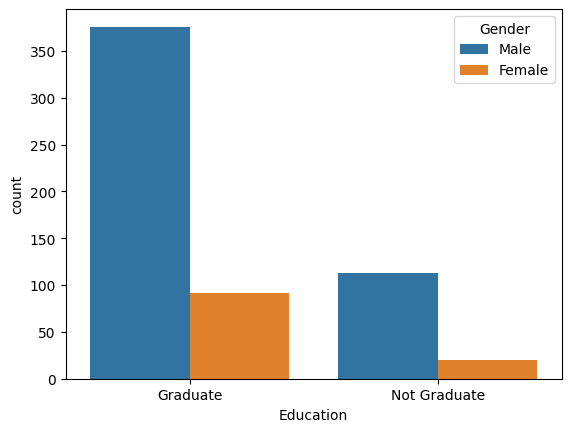

In [641]:
sns.countplot(x = "Education", data = df, hue="Gender")

In [642]:
# Graduate male  
df_male = df.loc[(df["Gender"]=="Male")& (df["Education"] == "Graduate")]

<AxesSubplot: xlabel='Gender', ylabel='count'>

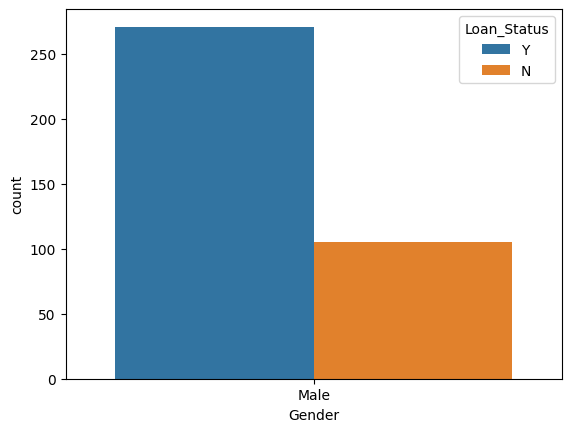

In [643]:
sns.countplot(x="Gender", hue="Loan_Status", data = df_male)

In [644]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Feature Engineering

#### Handeling missing/Null Value 

It a one way we can handelling the missing value but in this project we skip this
we will use knn imputer

In [645]:
# # Gender column 
# df['Gender'].mode()[0]       ## Male
# df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# # Married column
# df['Married'].mode() [0]   # Yes
# df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# # Dependents column
# df['Dependents'].mode()[0]   # 0
# df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# # Self_Employee
# df['Self_Employed'].mode()[0]   # No
# df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

# # Loan Amount
# df['LoanAmount'].mode()[0]   # 120

# # group by loan status because we have two category and there mean also may be varry
# # lets do seperate for Yes and No
# df.groupby('Loan_Status').get_group('N')

# # Mean of loan status -- No
# mean_N =  df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()   # 151.22

# # Mean of loan status -- Yes
# mean_Y =  df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()   # 144.29

# df.isna().sum()
# # Filling missing value in Loan status
# df.loc[df['Loan_Status']=='N','LoanAmount'] = df.loc[df['Loan_Status']=='N','LoanAmount'].fillna(df.loc[df['Loan_Status']=='N','LoanAmount'].mean())

# df.loc[df['Loan_Status']=='Y','LoanAmount'] = df.loc[df['Loan_Status']=='Y','LoanAmount'].fillna(df.loc[df['Loan_Status']=='Y','LoanAmount'].mean())
# # Loan Amount Term 
# df['Loan_Amount_Term'].mode()[0]   # 360
# df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

# # Credit history
# df['Credit_History'].mode()[0]   # 1
# df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

#### Feature Encoding

convert the categorical variable into numerical variable

In [646]:
# Gender Column
df['Gender'].replace({'Male': 1, 'Female': 0},inplace=True)

# Married column
df['Married'].replace({'Yes': 1, 'No': 0},inplace=True)

# Dependents column
df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3},inplace=True)

# Education column
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)

# Self Employee column
df['Self_Employed'].replace({'No': 0, 'Yes': 1},inplace=True)

# Property area column
df['Property_Area'].replace({'Semiurban': 1, 'Urban': 0, 'Rural': 2},inplace=True)

In [647]:
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

#### filling the missing value using knn imputer



In [648]:
# df.isna().sum()

In [649]:
# from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()

# datafame for impute the value
df_to_impute = df.drop(['Loan_ID','Loan_Status'],axis =1)

# Dataframe after imputing
df_imputed = knn_imputer.fit_transform(df_to_impute)


In [650]:
# df_imputed      ## numpy.ndarray

# tranfer nd arrey into data frame
imputed_df = pd.DataFrame(df_imputed,columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [651]:
imputed_df.isna().sum()
#sns.heatmap(imputed_df.isna())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Outlier Detection

In [652]:
# ApplicatIncome column
q1 = df['ApplicantIncome'].quantile(0.25)
q2 = df['ApplicantIncome'].quantile(0.5)
q3 = df['ApplicantIncome'].quantile(0.75)
q95 = df['ApplicantIncome'].quantile(0.95)
q98 = df['ApplicantIncome'].quantile(0.98)
q99 = df['ApplicantIncome'].quantile(0.99)
print('Q1 :',q1)
print('Q2 :',q2)
print('Q3 :',q3)

print(f'Q95 : {q95} Q98 : {q98} Q99 : {q99}')

print('Min :',df['ApplicantIncome'].min())
print('Max :',df['ApplicantIncome'].max())
print('Mean :',df['ApplicantIncome'].mean())
print('median :',df['ApplicantIncome'].median())

iqr = q3 - q1
print("IQR ",iqr)

upper_tail = q3 +1.5*iqr
lower_tail = q1 - 1.5*iqr

print('upper_tail :',upper_tail)
df['ApplicantIncome'].loc[df['ApplicantIncome']>upper_tail]
print(len(df['ApplicantIncome'].loc[df['ApplicantIncome']>upper_tail]))

Q1 : 2877.5
Q2 : 3812.5
Q3 : 5795.0
Q95 : 14583.0 Q98 : 19666.04 Q99 : 32540.410000000047
Min : 150
Max : 81000
Mean : 5403.459283387622
median : 3812.5
IQR  2917.5
upper_tail : 10171.25
50


In [653]:
# filled all value above than upper limit by Q95 percentile value
df['ApplicantIncome'].loc[df['ApplicantIncome']>upper_tail] = q95
print(len(df['ApplicantIncome'].loc[df['ApplicantIncome']>q95]))

0


In [654]:
# coaplicant Income

q1 = df['CoapplicantIncome'].quantile(0.25)
q2 = df['CoapplicantIncome'].quantile(0.5)
q3 = df['CoapplicantIncome'].quantile(0.75)
q95 = df['CoapplicantIncome'].quantile(0.95)
q98 = df['CoapplicantIncome'].quantile(0.98)
q99 = df['CoapplicantIncome'].quantile(0.99)
print('Q1 :',q1)
print('Q2 :',q2)
print('Q3 :',q3)

print(f'Q95 : {q95} Q98 : {q98} Q99 : {q99}')

print('Min :',df['CoapplicantIncome'].min())
print('Max :',df['CoapplicantIncome'].max())
print('Mean :',df['CoapplicantIncome'].mean())
print('median :',df['CoapplicantIncome'].median())

iqr = q3 - q1
print("IQR ",iqr)

upper_tail = q3 +1.5*iqr
lower_tail = q1 - 1.5*iqr


print('upper_tail :',upper_tail)
df['CoapplicantIncome'].loc[df['CoapplicantIncome']>upper_tail]
print(len(df['CoapplicantIncome'].loc[df['CoapplicantIncome']>upper_tail]))


Q1 : 0.0
Q2 : 1188.5
Q3 : 2297.25
Q95 : 4997.4 Q98 : 7198.56 Q99 : 8895.890000000003
Min : 0.0
Max : 41667.0
Mean : 1621.2457980271008
median : 1188.5
IQR  2297.25
upper_tail : 5743.125
18


In [655]:
# above than upper tail value by upper tail
df['CoapplicantIncome'].loc[df['CoapplicantIncome']>upper_tail] = upper_tail
print('Max :',df['CoapplicantIncome'].max())

Max : 5743.125


#### Train test split

In [656]:
x = imputed_df
y = df["Loan_Status"]

In [657]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.2 , random_state=45, stratify=y)

In [658]:
len(x_train)

491

In [659]:
len(y_train)

491

#### Model Building / Model selection

#### Logistic Regression

In [660]:
log_class = LogisticRegression()
log_class.fit(x_train,y_train)

LogisticRegression()

#### Evaluation

In [661]:
## Training data evalution
y_pred_train_log = log_class.predict(x_train)

acc_score_LR_train = accuracy_score(y_train,y_pred_train_log)
print('Accuracy Score:',acc_score_LR_train)


Accuracy Score: 0.8024439918533605


In [662]:
## Testing data evalution
y_pred_log = log_class.predict(x_test)

cnf_matrix = confusion_matrix(y_test , y_pred_log)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_LR = accuracy_score(y_test,y_pred_log)
print('Accuracy Score:',acc_score_LR)

clf_report = classification_report(y_test , y_pred_log)
print('classification report :',clf_report)

Confusion Matrix : 
 [[18 20]
 [ 0 85]]

Accuracy Score: 0.8373983739837398
classification report :               precision    recall  f1-score   support

           N       1.00      0.47      0.64        38
           Y       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123



#### KNN Clasification model

In [663]:
##### Scale the feature
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_std = std_scaler.fit_transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [664]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_std,y_train)

KNeighborsClassifier()

In [665]:
## Training data evalution
y_pred_knn_train = knn_model.predict(x_train_std)
acc_score_train_knn = accuracy_score(y_train,y_pred_knn_train)
print('Accuracy Score:',acc_score_train_knn)

Accuracy Score: 0.8167006109979633


In [666]:
## Testing data evalution
y_pred_knn = knn_model.predict(x_test_std)

cnf_matrix = confusion_matrix(y_test , y_pred_knn)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_test_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy Score:',acc_score_test_knn)

clf_report = classification_report(y_test , y_pred_knn)
print('classification report :',clf_report)

Confusion Matrix : 
 [[16 22]
 [ 7 78]]

Accuracy Score: 0.7642276422764228
classification report :               precision    recall  f1-score   support

           N       0.70      0.42      0.52        38
           Y       0.78      0.92      0.84        85

    accuracy                           0.76       123
   macro avg       0.74      0.67      0.68       123
weighted avg       0.75      0.76      0.74       123



#### Decision Tree

In [667]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [668]:
## Training data evalution
y_pred_dt_train = dt_model.predict(x_train)
acc_score_train_dt = accuracy_score(y_train,y_pred_dt_train)
print('Accuracy Score:',acc_score_train_dt)

Accuracy Score: 1.0


In [669]:
## Testing data evalution
y_pred_dt = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test , y_pred_dt)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_test_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy Score:',acc_score_test_dt)

clf_report = classification_report(y_test , y_pred_dt)
print('classification report :',clf_report)




Confusion Matrix : 
 [[21 17]
 [19 66]]

Accuracy Score: 0.7073170731707317
classification report :               precision    recall  f1-score   support

           N       0.53      0.55      0.54        38
           Y       0.80      0.78      0.79        85

    accuracy                           0.71       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.71      0.71      0.71       123



#### hyperparameter tunning for decision tree

#### Random forest

In [670]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [671]:
## Training data evalution
y_pred_rf_train = rf_model.predict(x_train)
acc_score_train_rf = accuracy_score(y_train,y_pred_dt_train)
print('Accuracy Score:',acc_score_train_rf)


Accuracy Score: 1.0


In [672]:
## Testing data evalution
y_pred_rf = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test , y_pred_rf)
print('Confusion Matrix : \n',cnf_matrix)
print()

acc_score_test_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy Score:',acc_score_test_rf)

clf_report = classification_report(y_test , y_pred_rf)
print('classification report :',clf_report)

Confusion Matrix : 
 [[18 20]
 [ 6 79]]

Accuracy Score: 0.7886178861788617
classification report :               precision    recall  f1-score   support

           N       0.75      0.47      0.58        38
           Y       0.80      0.93      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.70      0.72       123
weighted avg       0.78      0.79      0.77       123



<AxesSubplot: >

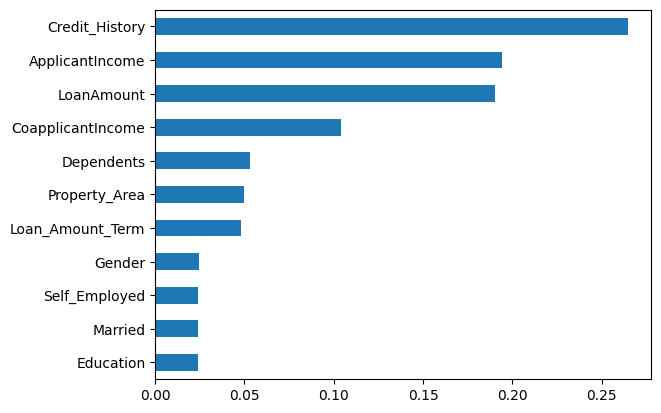

In [673]:
s1 = pd.Series(rf_model.feature_importances_,index=x.columns)
s1.sort_values().plot(kind = 'barh')

In [674]:
print('Acc_score_LR:',acc_score_LR,'Acc_score_knn',acc_score_test_knn,'Acc_score_dt :',acc_score_test_dt,'acc_score_rf :',acc_score_test_rf,sep='\n')

Acc_score_LR:
0.8373983739837398
Acc_score_knn
0.7642276422764228
Acc_score_dt :
0.7073170731707317
acc_score_rf :
0.7886178861788617


#### make the pickle file

In [675]:
import pickle

pickle.dump(log_class,open("LogModel.pickle", "wb"))

In [676]:
test_point =  x_test[6:7]
test_point

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
48,0.0,1.0,0.0,1.0,0.0,2645.0,3440.0,120.0,360.0,0.0,0.0


In [677]:
prediction = log_class.predict(test_point)
prediction[0]

'N'